<h1>REGRESSÃO LOGÍSTICA</h1>

A Regressão Logística é um algoritmo de aprendizado supervisionado usado para classificação binária (ou multiclasse em extensões). Apesar do nome “regressão”, seu objetivo é prever classes — e não valores contínuos.
<h3>🎯 O que é e qual o objetivo?</h3>
A regressão logística modela a probabilidade de uma observação pertencer a uma classe, utilizando uma função logística (sigmoide) para transformar uma combinação linear dos atributos em um valor entre 0 e 1:

𝑃(𝑦=1∣𝑋)=1/(1+𝑒−(𝛽0+𝛽1𝑥1+⋯+𝛽𝑛𝑥𝑛))

A saída é uma probabilidade → o modelo classifica com base em um limiar (por padrão, 0.5).

<h3>✅ Pré-requisitos</h3>
<ol>
    <li>Variável dependente binária (0 ou 1, ou codificável assim).</li>
    <li>Variáveis independentes numéricas ou categóricas codificadas.</li>
    <li>Relação logit-linear entre as features e o log das odds:</li>
</ol>

log⁡(𝑃/(1−𝑃))=𝛽0+𝛽1𝑥1+⋯+𝛽𝑛𝑥𝑛

<h3>✅ Vantagens</h3>
<ul>
    <li>Interpretável: coeficientes mostram a influência de cada variável na log-odds da classe.</li>
    <li>Funciona bem com dados binários e ruidosos.</li>
    <li>Computacionalmente eficiente.</li>
    <li>Base para modelos como regressão logística regularizada, multinomial e regressão logística em redes neurais</li>
</ul>

<h3>❌ Desvantagens</h3>
<ul>
    <li>Supõe relação linear entre variáveis e log-odds.</li>
    <li>Pode ter desempenho limitado em problemas não-lineares.</li>
    <li>Sensível a colinearidade e outliers.</li>
</ul>

<h3>💼 Aplicações comuns</h3>
<ul>
    <li>🏥 Saúde
        <ul>
            <li>Diagnóstico de doenças: prever presença/ausência de condição médica.</li>
        </ul>
    </li>
    <li>🛍️ Marketing
        <ul>
            <li>Churn Prediction: prever se um cliente vai cancelar um serviço.</li>
            <li>Conversão em campanhas: prever se um cliente vai comprar.</li>
        </ul>
    </li>
    <li>💳 Finanças
        <ul>
            <li>Concessão de crédito: prever inadimplência.</li>
        </ul>
    </li>
    <li>📧 NLP e segurança
        <ul>
            <li>Classificação de e-mails como spam/não spam.</li>
        </ul>
    </li>
</ul>

<h2>Iniciando o ambiente</h2>

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score


In [4]:
rcParams['figure.figsize'] = 6, 5


In [5]:
sb.set_style('whitegrid')


<h2>Carregando dataset titanic</h2>

In [7]:
titanic_training = pd.read_csv('titanic-training-data.csv')

In [8]:
titanic_training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print(titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<h2>Checando a variável objetivo</h2>

<Axes: xlabel='Survived', ylabel='count'>

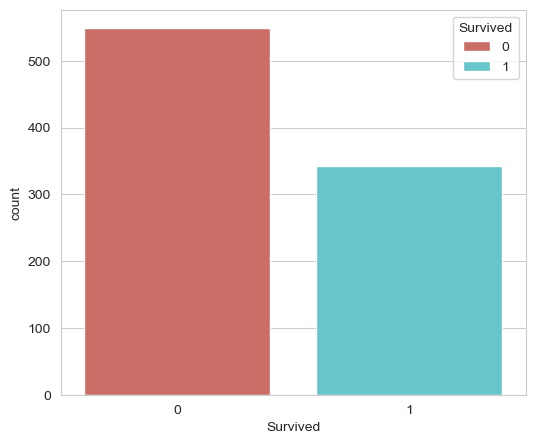

In [11]:
sb.countplot(data=titanic_training, x='Survived',hue='Survived', palette='hls')


<h2>Checando por valores ausentes</h2>

In [13]:
titanic_training.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:

titanic_training.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3>Eliminando variáveis:</h3>
<ol>
    <li>Que não contribuem para o objetivo </li>
    <li>Que existem valores ausentes em excesso (não podem ser inferidas)</li>
</ol>

In [108]:
titanic_data = titanic_training.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
titanic_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
titanic_data.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<h3>Tratando as informações ausentes</h3>

<h4>Age</h4>

<Axes: xlabel='Parch', ylabel='Age'>

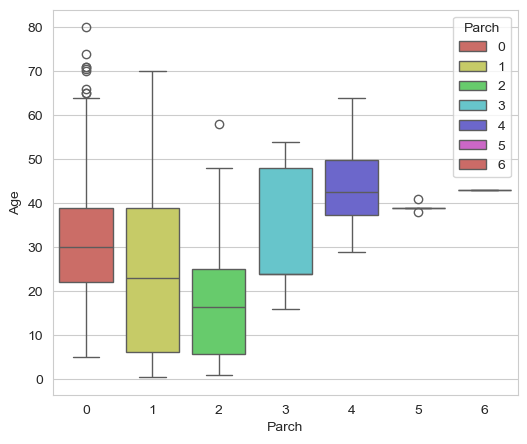

In [18]:
sb.boxplot(x='Parch', y='Age', data=titanic_data, hue='Parch', palette='hls')

In [19]:

parch_groups = titanic_data.groupby('Parch').mean(numeric_only=True)
parch_groups


,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,
0,0.343658,2.321534,32.178503,0.237463,25.586774
1,0.550847,2.203390,24.422000,1.084746,46.778180
2,0.500000,2.275000,17.216912,2.062500,64.337604
3,0.600000,2.600000,33.200000,1.000000,25.951660
4,0.000000,2.500000,44.500000,0.750000,84.968750
5,0.200000,3.000000,39.200000,0.600000,32.550000
6,0.000000,3.000000,43.000000,1.000000,46.900000


<h5>Função para inferir idade</h5>
<ul>
    <li>Objetivo: Se a idade não constar, retorna a idade média do grupo de Parch a que pertence. Caso contrário, retorna a idade informada</li>
    <li>Input: lista [Age, Parch]</li>
    <li>Output: Age</li>
</ul>

In [20]:

def age_aproximation(cols):
    age = cols.iloc[0]
    parch = cols.iloc[1]
    #Print(f'Age = {age}, Parch = {parch}')
   # return age
    if pd.isnull(age):
        if parch == 0:
            return 32
        elif parch == 1:
            return 24
        elif parch == 2:
            return 17
        elif parch == 3:
            return 33
        elif parch == 4:
            return 45
        #elif parch == 5:
        #    return 39
        #elif parch == 6:
        #    return 43
        else:
            return 30
    else:
        return age
    

In [21]:
titanic_data['Age'] = titanic_data[['Age','Parch']].apply(age_aproximation, axis=1)
titanic_data['Age'].isnull().sum()


0

<h4>Embarked</h4>

In [22]:
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
titanic_data.count()

Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

<h2>Convertendo variáveis categóricas em variáveios tipo dummy</h2>
<ul>
    <li>Modelos como regressão linear e regressão logística só trabalham com variáveis numéricas.</li>
    <li>Dummy variables são variáveis binárias criadas para representar uma variável categórica em um modelo matemático.</li>
</ul>


<h3>Criando dummy variable para 'Sex'</h3>

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Criar o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
    #-> drop='first' → remove uma categoria para evitar colinearidade.
    #-> sparse=False → retorna um array numpy denso, mais fácil de visualizar.

# Aplicar o encoder → precisa ser 2D, por isso [['Sex']]
sex_encoded = encoder.fit_transform(titanic_data[['Sex']])

# Ver as colunas resultantes
print(encoder.get_feature_names_out(['Sex']))

# Ver as dummies geradas
print(sex_encoded[0:5])


['Sex_male']
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [26]:

# 1 = Male / 0 = Female


In [27]:
titanic_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:

# Concatenar com o DataFrame original
titanic_data['Male_gender'] = sex_encoded

#titanic_data.rename(columns={'Sex': 'Male_gender'}, inplace=True)
titanic_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_gender
0,0,3,male,22.0,1,0,7.2500,S,1.0
1,1,1,female,38.0,1,0,71.2833,C,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0
3,1,1,female,35.0,1,0,53.1000,S,0.0
4,0,3,male,35.0,0,0,8.0500,S,1.0


<h3>Criando variável numérica para 'Embarked'</h3>

In [29]:
from sklearn.preprocessing import LabelEncoder

# Instanciar encoder
le = LabelEncoder()

# Ajustar e transformar a coluna 'Embarked'
titanic_data_num = le.fit_transform(titanic_data['Embarked'])

# Ver o resultado
print(titanic_data_num[0:10])



[2 0 2 2 2 1 2 2 2 0]


In [30]:
# C = 0 / Q = 1 / S = 2

<h4>Criação de colunas individuais com Pandas</h4>

In [31]:
# Gerar dummies para 'Embarked' → uma coluna para cada categoria
dummies_embarked = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')
print(dummies_embarked.head(10))


   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True
5       False        True       False
6       False       False        True
7       False       False        True
8       False       False        True
9        True       False       False


<h4>Criação de colunas individuais com o scikit-learn</h4>

In [33]:

# Criar o encoder
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Ajustar e transformar a coluna 'Embarked'
encoded = encoder.fit_transform(titanic_data[['Embarked']])

# Obter os nomes das novas colunas
encoded_columns = encoder.get_feature_names_out(['Embarked'])

# Converter para DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoded_columns)

# Concatenar com o DataFrame original
titanic_data = pd.concat([titanic_data.reset_index(drop=True), encoded_df], axis=1)

titanic_data.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_gender,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,1.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,0.0,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,0.0,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,1.0,0.0,0.0,1.0
5,0,3,male,32.0,0,0,8.4583,Q,1.0,0.0,1.0,0.0
6,0,1,male,54.0,0,0,51.8625,S,1.0,0.0,0.0,1.0
7,0,3,male,2.0,3,1,21.0750,S,1.0,0.0,0.0,1.0
8,1,3,female,27.0,0,2,11.1333,S,0.0,0.0,0.0,1.0
9,1,2,female,14.0,1,0,30.0708,C,0.0,1.0,0.0,0.0


<h3>Eliminando colunas não mais necessárias</h3>

In [34]:
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

titanic_data.head(10)


,Survived,Pclass,Age,SibSp,Parch,Fare,Male_gender,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0
5,0,3,32.0,0,0,8.4583,1.0,0.0,1.0,0.0
6,0,1,54.0,0,0,51.8625,1.0,0.0,0.0,1.0
7,0,3,2.0,3,1,21.0750,1.0,0.0,0.0,1.0
8,1,3,27.0,0,2,11.1333,0.0,0.0,0.0,1.0
9,1,2,14.0,1,0,30.0708,0.0,1.0,0.0,0.0


<h2>Checando a independência dos preditores (features)</h2>
<p>Próximo do 1 ou -1 mostra dependência</p>
<p>É o caso de FAre e Pclass<br>É nescessário excluir essas colunas do dataframe</p>

<Axes: >

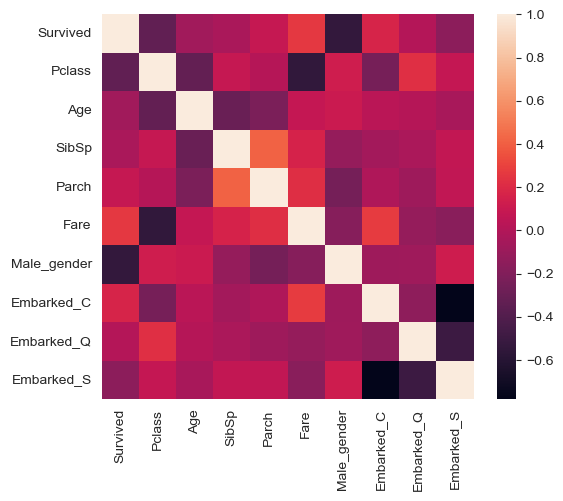

In [36]:
sb.heatmap(titanic_data.corr())

In [37]:

titanic_working = titanic_data.drop(['Pclass', 'Fare'], axis = 1)

   Survived   Age  SibSp  Parch  Male_gender  Embarked_C  Embarked_Q  \
0         0  22.0      1      0          1.0         0.0         0.0   
1         1  38.0      1      0          0.0         1.0         0.0   
2         1  26.0      0      0          0.0         0.0         0.0   
3         1  35.0      1      0          0.0         0.0         0.0   
4         0  35.0      0      0          1.0         0.0         0.0   
5         0  32.0      0      0          1.0         0.0         1.0   
6         0  54.0      0      0          1.0         0.0         0.0   
7         0   2.0      3      1          1.0         0.0         0.0   
8         1  27.0      0      2          0.0         0.0         0.0   
9         1  14.0      1      0          0.0         1.0         0.0   

   Embarked_S  
0         1.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0  
5         0.0  
6         1.0  
7         1.0  
8         1.0  
9         0.0  


<Axes: >

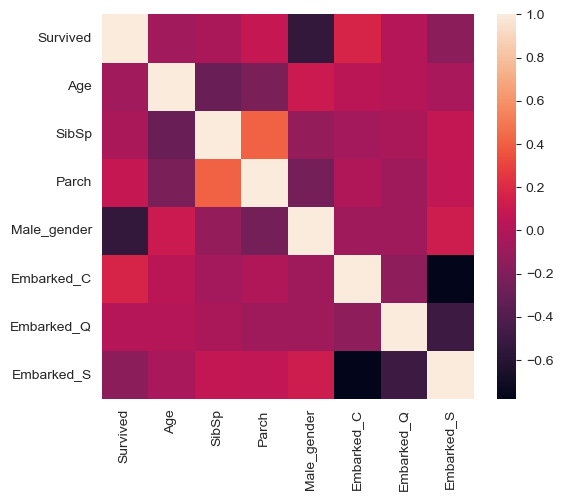

In [38]:
print(titanic_working.head(10))
sb.heatmap(titanic_working.corr())

<h2>Checando tamanho da base de dados </h2>
<h3>Suficiente para criar as previsões de sobervivência?</h3>

In [40]:
titanic_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    int64  
 1   Age          889 non-null    float64
 2   SibSp        889 non-null    int64  
 3   Parch        889 non-null    int64  
 4   Male_gender  889 non-null    float64
 5   Embarked_C   889 non-null    float64
 6   Embarked_Q   889 non-null    float64
 7   Embarked_S   889 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 55.7 KB


<h2> Quebrando os dados em conjunto de treinamento e conjunto de teste</h2>

In [42]:

x_train, x_test, y_train, y_test = train_test_split(titanic_working.drop('Survived', axis=1), 
                                                   titanic_working['Survived'], 
                                                   test_size=0.2,
                                                   random_state=200)


In [43]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(711, 7) (178, 7)
(711,) (178,)


In [44]:
x_train.head()

,Age,SibSp,Parch,Male_gender,Embarked_C,Embarked_Q,Embarked_S
719,6.0,0,1,0.0,0.0,0.0,1.0
165,24.0,0,1,0.0,0.0,0.0,1.0
879,33.0,0,0,1.0,0.0,0.0,1.0
451,30.0,0,0,1.0,1.0,0.0,0.0
181,9.0,4,2,1.0,0.0,0.0,1.0


In [45]:
y_train.head()

719    1
165    1
879    0
451    0
181    0
Name: Survived, dtype: int64

<h2>Organizando e avaliando o modelo</h2>

In [47]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)


LogisticRegression(solver='liblinear')

In [48]:
y_pred = logreg.predict(x_test)

w = (y_pred == y_test)
print(f'Número de acertos: {(100*w.sum()/w.count()):.1f}%')

Número de acertos: 81.5%


<h2>Avaliando o modelo</h2>
<h3>Relatório de classificação sem cross-validation</h3>

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       109
           1       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



<h2>K-fold cross validation & Confusion Matrix</h2>

In [52]:
y_train_pred = cross_val_predict(logreg, x_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[379,  61],
       [ 91, 180]], dtype=int64)

In [53]:
precision_score(y_train,  y_train_pred)

0.7468879668049793

<h2>Um teste de predição</h2>

In [55]:
titanic_working[863:864]

,Survived,Age,SibSp,Parch,Male_gender,Embarked_C,Embarked_Q,Embarked_S
863,1,42.0,0,0,0.0,0.0,0.0,1.0


In [56]:

test_pass = np.array([40,0,0,0,0,0,1]).reshape(1,-1)
test_passanger = pd.DataFrame(test_pass, columns=['Age','SibSp','Parch','Male_gender','Embarked_C','Embarked_Q','Embarked_S'])
print(f'\nPreditores do teste:\n{test_passanger}')
print(f'Sobrevive? (0=Não, 1=Sim) {logreg.predict(test_passanger)}')
print(f'Probabilidade de morte: {logreg.predict_proba(test_passanger)[0][0]*100:.1f}%')
print(f'Probabilidade de sobrevivência: {logreg.predict_proba(test_passanger)[0][1]*100:.1f}%\n')



Preditores do teste:
   Age  SibSp  Parch  Male_gender  Embarked_C  Embarked_Q  Embarked_S
0   40      0      0            0           0           0           1
Sobrevive? (0=Não, 1=Sim) [1]
Probabilidade de morte: 27.0%
Probabilidade de sobrevivência: 73.0%

